In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

In [2]:
amazon = pd.read_csv('review-9.csv',encoding='ISO-8859-1')
y = amazon['rating']
x = amazon['body']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
vector = TfidfVectorizer(max_features = 5000, max_df = 0.95, min_df = 5, stop_words = 'english')
user_vector= vector.fit(x)
x_test = user_vector.transform(x_test).toarray()
x_train = user_vector.transform(x_train).toarray()

In [4]:
cf= ensemble.RandomForestClassifier(class_weight = 'balanced',n_estimators=111, max_depth=46, random_state =20)
cf.fit(x_train, y_train)
y_pre= cf.predict(x_test)

<AxesSubplot:ylabel='0'>

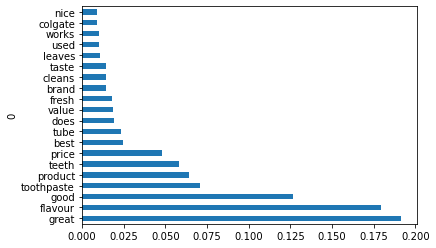

In [5]:
f = pd.DataFrame(vector.get_feature_names())
f.set_index([0], inplace=True,drop = False)
features=  f.transpose()
importances = cf.feature_importances_[:20]
feat_importances = pd.Series(cf.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')